In [0]:
import pandas as pd
import numpy as np
from google.colab import files


# Visualizing data
import seaborn as sns
import matplotlib.pyplot as plt
from functools import partial
from matplotlib.ticker import FuncFormatter
import matplotlib as matplotlib


# Feature encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split

# Dimensionality reduction
from sklearn.decomposition import PCA, TruncatedSVD, SparsePCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # Maximizes the separability among known categories

#Feature extraction
from sklearn.preprocessing import StandardScaler, LabelBinarizer, Binarizer, OrdinalEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Metrics and models
from sklearn.metrics import accuracy_score, f1_score, precision_score, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, learning_curve, ShuffleSplit
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn_pandas import CategoricalImputer

from scipy import sparse as spr

In [0]:
data = pd.read_csv('survey.csv')

**PREPROCESSING**

In [124]:
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN


**DATA CLEANING**

In [140]:
data.isnull().sum().sort_values(ascending = False)

comments                     1095
state                         515
work_interfere                264
self_employed                  18
Country_mean                    0
Age                             0
Gender                          0
Country                         0
family_history                  0
treatment                       0
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
Timestamp                       0
dtype: int64

In [141]:
print(len(data['Timestamp'].unique()))

1246


In [142]:
print(data['state'].unique())

['IL' 'IN' nan 'TX' 'TN' 'MI' 'OH' 'CA' 'CT' 'MD' 'NY' 'NC' 'MA' 'IA' 'PA'
 'WA' 'WI' 'UT' 'NM' 'OR' 'FL' 'MN' 'MO' 'AZ' 'CO' 'GA' 'DC' 'NE' 'WV'
 'OK' 'KS' 'VA' 'NH' 'KY' 'AL' 'NV' 'NJ' 'SC' 'VT' 'SD' 'ID' 'MS' 'RI'
 'WY' 'LA' 'ME']


In [0]:
data = data.drop(['Timestamp'], axis=1) # Dropping feature "Timestamp" because it doesn't carry any crucial information: every person is surveyed in same day
data = data.drop(['comments'], axis=1) # Dropping feature "comments" because it contains about 1200 NaN values
data = data.drop(['state'], axis=1)  # Dropping feature "state" because it only applies to United States

In [144]:
data.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'Country_mean'],
      dtype='object')

In [145]:
data.head(5)


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Country_mean
0,37,Female,North America,NaN,No,1,Often,0.2,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,0.545939
1,44,M,North America,NaN,No,0,Rarely,1.0,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,0.545939
2,32,Male,North America,NaN,No,0,Rarely,0.2,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,0.513889
3,31,Male,Europe,NaN,Yes,1,Often,0.4,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,0.502703
4,31,Male,North America,NaN,No,0,Never,0.6,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,0.545939


In [146]:
# Let's see the percent of null data

percent_of_null_data = (data.isnull().sum() / data.isnull().count()).sort_values(ascending = False)
print(percent_of_null_data)

work_interfere               0.209690
self_employed                0.014297
Country_mean                 0.000000
care_options                 0.000000
Gender                       0.000000
Country                      0.000000
family_history               0.000000
treatment                    0.000000
no_employees                 0.000000
remote_work                  0.000000
tech_company                 0.000000
benefits                     0.000000
wellness_program             0.000000
obs_consequence              0.000000
seek_help                    0.000000
anonymity                    0.000000
leave                        0.000000
mental_health_consequence    0.000000
phys_health_consequence      0.000000
coworkers                    0.000000
supervisor                   0.000000
mental_health_interview      0.000000
phys_health_interview        0.000000
mental_vs_physical           0.000000
Age                          0.000000
dtype: float64


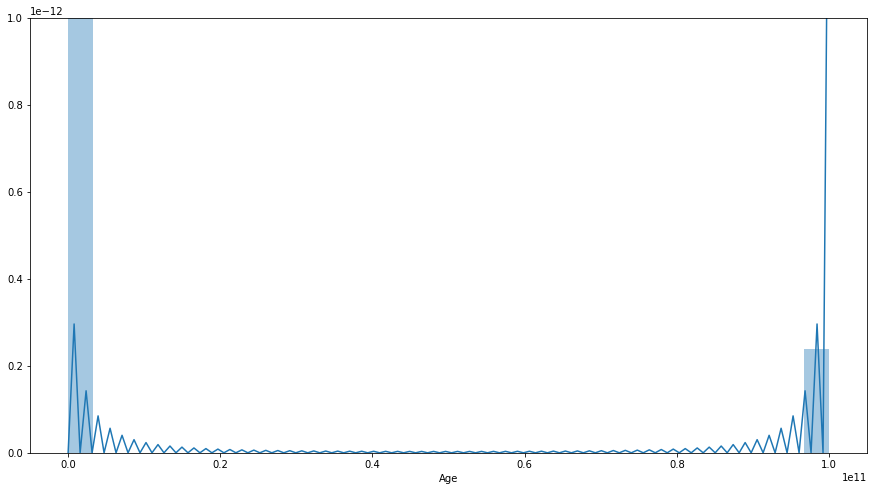

In [147]:
# Using seaborn to plot a univariate distribution of age
plt.figure(figsize=(15,8))
sns.distplot(data['Age'], bins = 30)

Text(0.5, 1.0, 'Treatment')

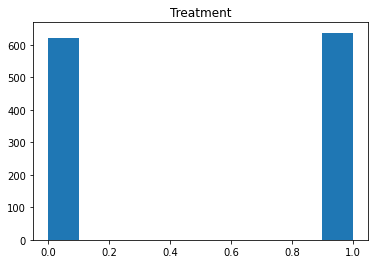

In [148]:
# Plotting the histogram to see how many people is treated and not treated

plt.hist(data['treatment'])
plt.title('Treatment')

Text(0.5, 1.0, 'Mental health consequence')

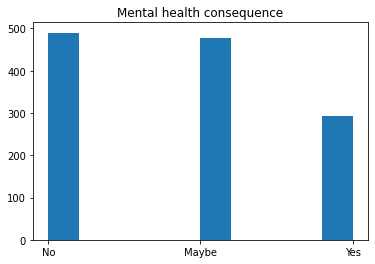

In [149]:
# Plotting the histogram to see how many people have mental health consequence


plt.hist(data['mental_health_consequence'])
plt.title('Mental health consequence')

**HANDLING MISSING DATA AND MEANINGLESS DATA**

In [0]:
# Let's fill missing data

categorical_imputer = CategoricalImputer()
data['self_employed'] = categorical_imputer.fit_transform(data['self_employed'])

In [0]:
# Replace NaN values in feature "state" with value "No state"

#data['state'].replace(to_replace=np.nan, value='No state', inplace=True)

In [152]:
# Checking how many NaN values we still have

data.isnull().sum().sort_values(ascending = False)

work_interfere               264
Country_mean                   0
care_options                   0
Gender                         0
Country                        0
self_employed                  0
family_history                 0
treatment                      0
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
wellness_program               0
obs_consequence                0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
Age                            0
dtype: int64

In [153]:
wi_na = data[data['work_interfere'].isna()].index
wi_na

Int64Index([  19,   26,   37,   38,   41,   46,   47,   51,   52,   54,
            ...
            1202, 1203, 1210, 1215, 1218, 1226, 1229, 1244, 1254, 1257],
           dtype='int64', length=264)

In [0]:
# Replace NaN values of feature "work_interfere" with "Not sure"
#categorical_imputer1 = CategoricalImputer()
data['work_interfere'].unique()
#data['work_interfere'] = categorical_imputer1.fit_transform(data['work_interfere'])
data['work_interfere'].replace(to_replace=np.nan, value="Not sure", inplace=True)
#data['work_interfere'] = data['work_interfere'].interpolate(method='pad')

In [155]:
# Let's see what values exist for feature "Gender" and replace all "strange" values with one of the following three: female, male, trans

data['Gender'] = data['Gender'].str.lower()
data['Gender'].unique()

array(['female', 'm', 'male', 'male-ish', 'maile', 'trans-female',
       'cis female', 'f', 'something kinda male?', 'cis male', 'woman',
       'mal', 'male (cis)', 'queer/she/they', 'non-binary', 'femake',
       'make', 'nah', 'all', 'enby', 'fluid', 'genderqueer', 'female ',
       'androgyne', 'agender', 'cis-female/femme', 'guy (-ish) ^_^',
       'male leaning androgynous', 'male ', 'man', 'trans woman', 'msle',
       'neuter', 'female (trans)', 'queer', 'female (cis)', 'mail',
       'a little about you', 'malr', 'p', 'femail', 'cis man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [0]:
female = ['female', 'cis female', 'f', 'woman', 'femake', 'female ', 'cis-female/femme', 'female (cis)', 'femail']
male = ['m', 'male', 'male-ish', 'maile', 'cis male', 'mal', 'male (cis)', 'make', 'male ', 'man', 'msle', 'mail', 'malr', 'cis man']
trans = ['male-ish', 'trans-female', 'something kinda male?', 'queer/she/they', 'non-binary', 'nah', 'all', 'enby', 'fluid', 'genderqueer',
         'androgyne', 'agender', 'guy (-ish) ^_^', 'male leaning androgynous', 'trans woman', 'neuter', 'female (trans)', 'queer', 'ostensibly male, unsure what that really means']

In [0]:
data['Gender'].replace(to_replace=female, value='female',inplace=True)
data['Gender'].replace(to_replace=male, value='male',inplace=True)
data['Gender'].replace(to_replace=trans, value='trans',inplace=True)

In [0]:
# Get rid of meaningless data

data = data[data['Gender'] != 'p']
data = data[data['Gender'] != 'a little about you']

In [160]:
# Checking if there are some not valid values for feature "Age"
total_num_age_examples = len(data['Age'])
num = len(data[(data['Age'] > 0) & (data['Age'] < 123)]) # The oldest person recorded lived 122 years, 164 days (Jeanne Calment, 1875-1997)
difference = total_num_age_examples - num
difference

4

In [161]:
uncleaned_age_data = data[(data['Age'] < 0) | (data['Age'] > 123)]
len(uncleaned_age_data)
uncleaned_age_data['Age'].index

Int64Index([143, 364, 390, 715], dtype='int64')

In [0]:
# Drop samples with not valid values of age
data = data.drop(uncleaned_age_data['Age'].index) 


In [159]:
# Just checking if there is some NaN values left
#data.head(5)
data.isnull().sum().sort_values(ascending = False)

Country_mean                 0
care_options                 0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
wellness_program             0
obs_consequence              0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
Age                          0
dtype: int64

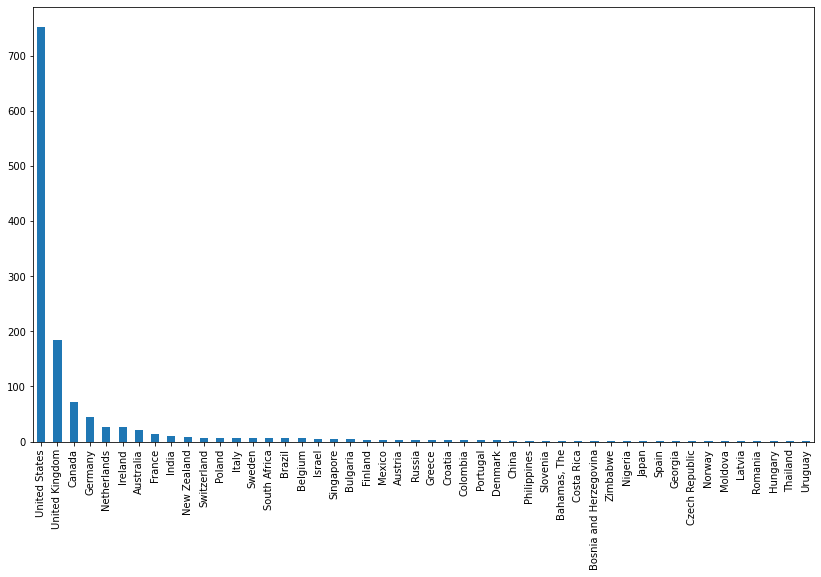

In [125]:
data['Country'].value_counts().plot(kind='bar',figsize=(14,8)) 

In [0]:
target_encoder = LabelBinarizer()
data['treatment'] = np.reshape(target_encoder.fit_transform(data['treatment']), (-1, 1))

In [0]:
country_mean = pd.DataFrame(data['Country'].copy())

In [0]:
gb = data.groupby(['Country'])['treatment']
groups = gb.groups.keys()

In [0]:
# Group by country and calculate mean based on occurrence of target feature in each category
gb_mean = data.groupby(['Country'])['treatment'].mean()

In [0]:
for i,key in enumerate(groups):
  country_mean.loc[country_mean['Country']==key,['Country']]=gb_mean[i]

In [0]:
# Adding new feature for new calculated data
data['Country_mean'] = country_mean
data['Country_mean'] = data['Country_mean'].astype('float')

In [132]:
data['Country'].unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [0]:
# Collecting countries in bigger groups
north_america = ['United States', 'Canada']
central_america = ['Mexico', 'Costa Rica', 'Bahamas, The']
south_america = ['Brazil', 'Colombia', 'Uruguay']
europe = ['United Kingdom', 'Bulgaria', 'France', 'Slovenia',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Germany', 'Russia', 'Austria', 'Ireland', 'Italy', 'Sweden', 'Latvia', 'Romania', 'Belgium',
       'Spain', 'Finland', 'Bosnia and Herzegovina', 'Hungary', 'Croatia', 'Norway', 'Denmark', 'Georgia', 'Czech Republic']
asia = ['India', 'New Zealand', 'Israel', 'Singapore', 'Japan', 'Thailand', 'Greece', 'Moldova', 'China', 'Philippines']
africa = ['South Africa', 'Zimbabwe', 'Nigeria']

In [0]:
data['Country'].replace(to_replace=north_america, value='North America', inplace=True)
data['Country'].replace(to_replace=central_america, value='Central America', inplace=True)
data['Country'].replace(to_replace=south_america, value='South America', inplace=True)
data['Country'].replace(to_replace=europe, value='Europe', inplace=True)
data['Country'].replace(to_replace=asia, value='Asia', inplace=True)
data['Country'].replace(to_replace=africa, value='Africa', inplace=True)

In [135]:
data['Country'].unique()

array(['North America', 'Europe', 'Australia', 'Central America',
       'South America', 'Asia', 'Africa'], dtype=object)

In [0]:
#west = ["WA", "OR", "CA", "NV", "ID", "MT", "WY", "UT", "AZ", "NM", "CO"]
#midwest = ["ND", "SD", "NE", "KS", "MN", "IA", "MO", "WI", "IL", "IN", "OH", "MI"]
#northeast = ["ME",  "NH", "VT", "MA", "CT", "RI", "NY", "PA", "NJ"]
#south = ["MD", "DE", "DC", "WV",  "VA", "NC","SC", "GA", "FL", "KY", "TN", "AL", "MS", "AR", "LA", "OK", "TX"]

#data['state'] = data['state'].apply(lambda x:"West" if x in west else x)
#data['state'] = data['state'].apply(lambda x:"Midwest" if x in midwest else x)
#data['state'] = data['state'].apply(lambda x:"Northeast" if x in northeast else x)
#data['state'] = data['state'].apply(lambda x:"South" if x in south else x)

**FEATURE EXTRACTION**

In [0]:
# Encoding classes of number of employees feature in oridinal order
data.loc[data['no_employees']=='1-5',['no_employees']]=0
data.loc[data['no_employees']=='6-25',['no_employees']]=1
data.loc[data['no_employees']=='26-100',['no_employees']]=2
data.loc[data['no_employees']=='100-500',['no_employees']]=3
data.loc[data['no_employees']=='500-1000',['no_employees']]=4
data.loc[data['no_employees']=='More than 1000',['no_employees']]=5

In [0]:
data['no_employees'] = data['no_employees'].astype('float')

In [0]:
scaler_empl = MinMaxScaler()
scaler_empl.fit(data[['no_employees']])
data['no_employees'] = scaler_empl.transform(data[['no_employees']])

In [0]:
target = data['treatment']
target = pd.DataFrame(target, columns=['treatment'])
data = data.drop(columns=['treatment'])
data = pd.get_dummies(data)

In [0]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
data['Age'] = data['Age'].astype('float')
scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])

In [0]:
#from sklearn.preprocessing import PolynomialFeatures
#poly = PolynomialFeatures(2)
#dtr = poly.fit_transform([data['Age'], data['no_employees']])

In [0]:
#dtr[:10]

In [0]:
#data['Age_1'] = [elem[2] for elem in dtr]

In [0]:
#data

**CORRELATION MATRIX**

In [0]:
# Correlation matrix to show which variable is having a high or low correlation in respect to another variable
corr = data.corr()
#f, ax = plt.subplots(figsize=(60, 60))
#sns.heatmap(corr, annot=True, linewidths=.5, fmt='.1f', ax=ax)

*FUNCTIONS*

In [0]:
def plot_learning_curve(abs_train_sizes, train_scores, test_scores, fit_times):
  mean_train_scores = np.mean(train_scores,axis=1)
  mean_test_scores = np.mean(test_scores,axis=1)
  #plt.figure(figsize=10,10))
  plt.title('Learning curve')
  plt.plot(abs_train_sizes,mean_train_scores,'o-',label='train-acc')
  plt.plot(abs_train_sizes,mean_test_scores,'o-',label='val-acc')
  plt.ylabel('Accuracy')
  plt.xlabel('Training data size')
  plt.legend()


In [0]:
def confusion_heatmap(test_y, predicted):
  cf_matrix = confusion_matrix(test_y, predicted)
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

  plt.show()


In [0]:
def lr_curve(model):
  train_frac = np.linspace(0.01,1.0,num=20)
  train_s, train_sc, test_sc, fit_t, _= learning_curve(model,reduced_train_data,train_target,return_times=True,cv=5,train_sizes=train_frac)
  plot_learning_curve(abs_train_sizes=train_s, train_scores=train_sc, test_scores=test_sc, fit_times=fit_t)


In [0]:
def bar_plot(ax, data, total_width, single_width):

    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    n_bars = len(data)
    bar_width = total_width / n_bars
    bars = []

    for i, (name, values) in enumerate(data.items()):
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        bars.append(bar[0])

    ax.legend(bars, data.keys())
    plt.xticks([])
    plt.xlabel('Train score                           Test score')
    plt.ylim(0.4, 1)
    plt.yticks(np.arange(0.4, 1, step=0.01))



**SPLITING THE DATA**

In [0]:
#train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 9)
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = 0.3, random_state = 9)
#train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = 0.5, random_state = 9)
#train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = 0.7, random_state = 9)

In [176]:
# The "accuracy" scoring is proportional to the number of correct classifications

#svc_rf = SuportVectorClassifier(kernel='linear')
#random_forest_rf = RandomForestClassifier()
clf_rf_4 = ExtraTreesClassifier(random_state=50) 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='neg_mean_squared_error')   #5-fold cross-validation
rfecv = rfecv.fit(train_data, train_target)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', train_data.columns[rfecv.support_])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal number of features : 38
Best features : Index(['Age', 'no_employees', 'Country_mean', 'Gender_male',
       'Country_North America', 'family_history_No', 'family_history_Yes',
       'work_interfere_Never', 'work_interfere_Not sure',
       'work_interfere_Often', 'work_interfere_Rarely',
       'work_interfere_Sometimes', 'remote_work_No', 'remote_work_Yes',
       'tech_company_Yes', 'benefits_Don't know', 'benefits_Yes',
       'care_options_No', 'care_options_Not sure', 'care_options_Yes',
       'wellness_program_No', 'seek_help_Don't know', 'seek_help_No',
       'anonymity_Don't know', 'leave_Don't know',
       'mental_health_consequence_Maybe', 'mental_health_consequence_No',
       'mental_health_consequence_Yes', 'phys_health_consequence_No',
       'coworkers_No', 'coworkers_Some of them', 'supervisor_No',
       'supervisor_Some of them', 'supervisor_Yes',
       'phys_health_interview_Maybe', 'phys_health_interview_No',
       'mental_vs_physical_Don't know', 'obs

In [177]:
train_data.drop(columns=train_data.columns[~rfecv.support_])
test_data.drop(columns=test_data.columns[~rfecv.support_])

,Age,no_employees,Country_mean,Gender_male,Country_North America,family_history_No,family_history_Yes,work_interfere_Never,work_interfere_Not sure,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,remote_work_No,remote_work_Yes,tech_company_Yes,benefits_Don't know,benefits_Yes,care_options_No,care_options_Not sure,care_options_Yes,wellness_program_No,seek_help_Don't know,seek_help_No,anonymity_Don't know,leave_Don't know,mental_health_consequence_Maybe,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_No,coworkers_No,coworkers_Some of them,supervisor_No,supervisor_Some of them,supervisor_Yes,phys_health_interview_Maybe,phys_health_interview_No,mental_vs_physical_Don't know,obs_consequence_Yes
1004,0.447761,0.0,0.502703,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1
201,0.432836,0.8,0.545939,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
88,0.358209,0.4,0.545939,0,1,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0,0,1
134,0.283582,0.4,0.513889,1,1,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0
620,0.283582,0.6,0.466667,1,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,0.373134,0.4,0.250000,1,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1
196,0.447761,0.8,0.545939,0,1,1,0,1,0,0,0,0,0,1,1,1,0,0,1,0,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,1,1,0
1070,0.507463,0.2,0.545939,0,1,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,1,0,0,0
1053,0.462687,0.0,0.545939,1,1,1,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0


**FEATURE IMPORTANCE**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


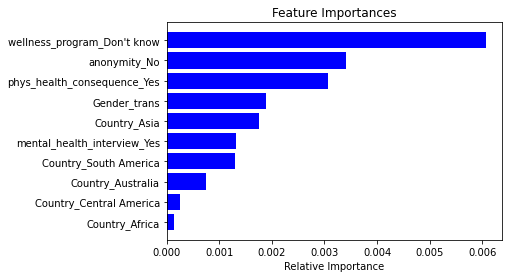

In [178]:
model = ExtraTreesClassifier(random_state=0)
#model = RandomForestClassifier()
model.fit(train_data, train_target)
features = train_data.columns
importances = model.feature_importances_
indices = np.argsort(importances, kind='quicksort')[:10]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

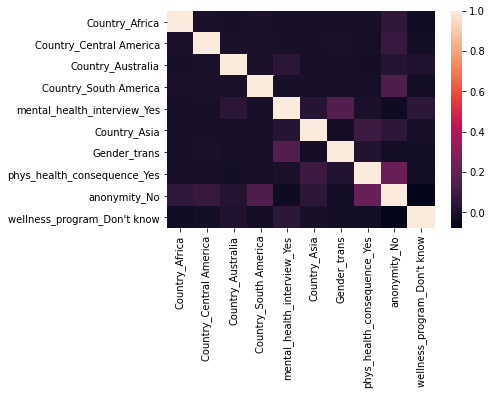

In [179]:
corr_importance = train_data[[features[i] for i in indices]].corr()
sns.heatmap(corr_importance)

In [180]:
print(train_data.shape)
print(train_target.shape)
print(test_data.shape)
print(test_target.shape)

(877, 69)
(877, 1)
(376, 69)
(376, 1)


In [181]:
spr.issparse(train_data) # Checking if matrix is sparse

False

In [182]:
train_target[train_target == 1].count()

treatment    450
dtype: int64

Text(0.5, 1.0, 'Total Distribuition by treated or not')

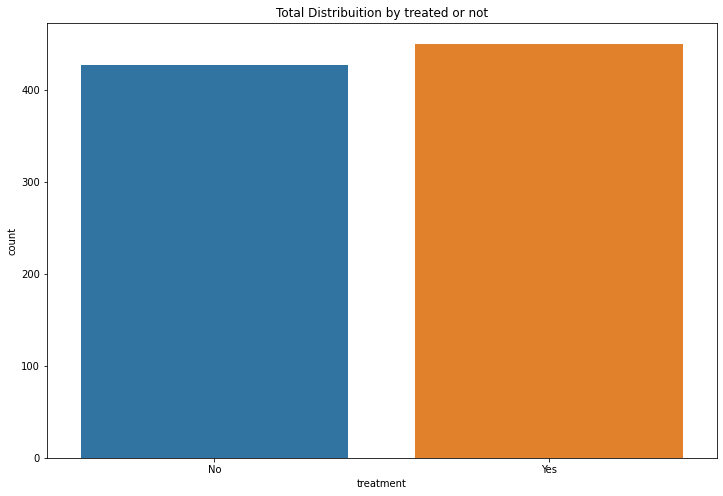

In [183]:
# How many people have been treated?
plt.figure(figsize=(12,8))
labels = ['No', 'Yes']
g = sns.countplot(x='treatment', data=train_target) 
g.set_xticklabels(labels)

plt.title('Total Distribuition by treated or not')

In [0]:
accuracy_arr = [] # for storing accuracy results of different models; 


**DATA REDUCTION**

In [185]:
# Parameter tuning for LDA 

param_grid = {'n_components': [5, 10, 20, 27, 35, 40,45]}
search = GridSearchCV(LinearDiscriminantAnalysis(), param_grid, cv=4)
search.fit(train_data.to_numpy(), train_target)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print('Test_score:',search.score(test_data.to_numpy(),test_target))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(69, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d 

Best parameter (CV score=0.837):
{'n_components': 5}
Test_score: 0.8351063829787234


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(69, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger tha

In [186]:
#pca = PCA(n_components=10) # Accuracy about 0.6196
#pca = SparsePCA(n_components=27) # Worse accuracy
lda = LinearDiscriminantAnalysis(n_components=5) 
lda.fit(train_data, train_target)
reduced_train_data = lda.transform(train_data)
reduced_test_data = lda.transform(test_data)
#lda_prediction = lda.predict(test_data)
#accuracy_score(test_target, lda_prediction)

#print(reduced_train_data.shape)
#print(reduced_train_data)
#print(reduced_test_data.shape)
#print(test_target.shape)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(69, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


**EVALUATING MODELS**


1.  DummyClassifier
2.  GaussianNB
3.  MLP
4.  SVC
5.  DecisionTreeClassifier
6.  BaggingClassifier
7.  KNNClassifier
8.  RandomForestClassifier
9.  AdaBoostClassifier
10. PIPE



In [0]:
arr = []
train_test_arr = {}

Train accuracy:  0.5131128848346637
Test accuracy:  0.48404255319148937
F1 score:  0.6523297491039427
Accuracy score:  0.48404255319148937
Precision score:  0.48404255319148937


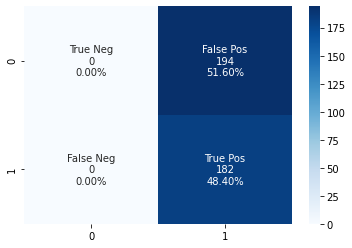

(2, 72944)


In [188]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(train_data, train_target)
dummy_predictions = dummy.predict(test_data)

#dummy.fit(reduced_train_data, train_target)
#dummy_predictions = dummy.predict(reduced_test_data)

#print('Train accuracy: ', dummy.score(train_data, train_target))
#print('Test accuracy: ', dummy.score(test_data, test_target))
print('Train accuracy: ', dummy.score(reduced_train_data, train_target))
print('Test accuracy: ', dummy.score(reduced_test_data, test_target))

train_test_arr.update(Dummy = [dummy.score(reduced_train_data, train_target), dummy.score(reduced_test_data, test_target)])

f1_dummy = f1_score(test_target, dummy_predictions)
acc_sc_dummy = accuracy_score(test_target, dummy_predictions) 
prec_sc_dummy = precision_score(test_target, dummy_predictions, average='micro')
print('F1 score: ', f1_dummy)
print('Accuracy score: ', acc_sc_dummy)
print('Precision score: ', prec_sc_dummy)
confusion_heatmap(test_target, dummy_predictions)
accuracy_arr.append(acc_sc_dummy)

arr.append(['Dummy classifier', dummy.score(reduced_train_data, train_target), dummy.score(reduced_test_data, test_target), f1_dummy, acc_sc_dummy, prec_sc_dummy])

test_tar = np.asarray(test_target)
misclassified = np.where(test_tar != dummy.predict(reduced_test_data))
misclassified
print(np.array(misclassified).shape) # ???

#failed_samples = reduced_test_data[np.logical_and(test_target!= dummy_predictions, test_target=1)]
#print(failed_samples.shape)

#for row_index, (input, prediction, label) in enumerate(zip (reduced_test_data, dummy_predictions, test_target)):
#  if prediction != label:
#    print('Row', row_index, 'has been classified as ', prediction, 'and should be ', label)

#for item, label in zip(test_data, test_target):
#    result = dummy.predict([item])
#    if result != label:
#        print ("predicted label", result, "but true label is", label)

In [0]:
#lr_curve(dummy)

Train accuracy:  0.8517673888255416
Test accuracy:  0.8351063829787234
F1 score:  0.8450000000000001
Accuracy score:  0.8351063829787234
Precision score:  0.8351063829787234


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


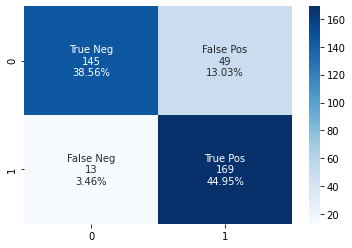

In [190]:
nb = GaussianNB()
#nb.fit(train_data, train_target)
#nb_predictions = nb.predict(test_data)

nb.fit(reduced_train_data, train_target)
nb_predictions = nb.predict(reduced_test_data)

#print('Train accuracy: ', nb.score(train_data, train_target))
#print('Test accuracy: ', nb.score(test_data, test_target))
print('Train accuracy: ', nb.score(reduced_train_data, train_target))
print('Test accuracy: ', nb.score(reduced_test_data, test_target))

train_test_arr.update(GNB = [nb.score(reduced_train_data, train_target), nb.score(reduced_test_data, test_target)])


f1_nb = f1_score(test_target, nb_predictions)
acc_sc_nb = accuracy_score(test_target, nb_predictions) 
prec_sc_nb = precision_score(test_target, nb_predictions, average='micro')
print('F1 score: ', f1_nb)
print('Accuracy score: ', acc_sc_nb)
print('Precision score: ', prec_sc_nb)
confusion_heatmap(test_target, nb_predictions)
accuracy_arr.append(acc_sc_nb)

arr.append(['Gaussian Naive Bayes', nb.score(reduced_train_data, train_target), nb.score(reduced_test_data, test_target), f1_nb, acc_sc_nb, prec_sc_nb])

In [0]:
#lr_curve(nb)

In [192]:
# Tuning parametrs for MLPClassifier

tuned_parameters = [{'activation': ['identity', 'logistic', 'relu', 'tanh'], 
                     'solver':['lbfgs', 'sgd', 'adam'], 
                     }]
search = RandomizedSearchCV(estimator=MLPClassifier(),param_distributions=tuned_parameters,scoring='accuracy',cv=10,return_train_score=True)
#search = GridSearchCV(estimator=MLPClassifier(),param_grid=tuned_parameters,scoring='accuracy',cv=10,return_train_score=True)
search.fit(reduced_train_data,train_target)
#search.fit(train_data, train_target)
print('Best-params:',search.best_params_) # identity, sgd
print('Best-score:',search.best_score_)
print(search.cv_results_.keys())

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimizati

Best-params: {'solver': 'adam', 'activation': 'relu'}
Best-score: 0.8563479623824453
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_solver', 'param_activation', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])


In [0]:
#mlp = MLPClassifier(activation='identity', solver='adam', shuffle=True) 
mlp = MLPClassifier(activation='tanh', solver='sgd', shuffle=True)
#mlp = MLPClassifier(activation='identity', solver='lbfgs', shuffle=True) 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train acc:  0.8517673888255416
Test acc:  0.8351063829787234
F1 score:  0.8450000000000001
Accuracy score:  0.8351063829787234
Precision score:  0.8351063829787234


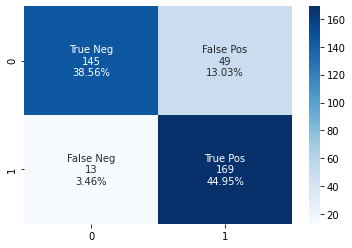

In [194]:
mlp.fit(reduced_train_data, train_target)
#mlp.fit(train_data, train_target)
print('Train acc: ',mlp.score(reduced_train_data, train_target))
print('Test acc: ', mlp.score(reduced_test_data, test_target))
#print('Train acc: ',mlp.score(train_data, train_target))
#print('Test acc: ', mlp.score(test_data, test_target))

train_test_arr.update(MLP = [mlp.score(reduced_train_data, train_target), mlp.score(reduced_test_data, test_target)])


mlp_predictions = mlp.predict(reduced_test_data)
#mlp_predictions = mlp.predict(test_data)

f1_mlp = f1_score(test_target, mlp_predictions)
acc_sc_mlp = accuracy_score(test_target, mlp_predictions) 
prec_sc_mlp = precision_score(test_target, mlp_predictions, average='micro')
print('F1 score: ', f1_mlp)
print('Accuracy score: ', acc_sc_mlp)
print('Precision score: ', prec_sc_mlp)
confusion_heatmap(test_target, mlp_predictions)

accuracy_arr.append(acc_sc_mlp)

arr.append(['MLP', mlp.score(reduced_train_data, train_target), mlp.score(reduced_test_data, test_target), f1_mlp, acc_sc_mlp, prec_sc_mlp])

In [0]:
#lr_curve(mlp)

In [196]:
C_range = [1, 10, 100, 1000]    #[10**x for x in np.arange(-1,3,0.0125)]
gamma_range = [0.0001, 0.001, 0.01, 0.1]    #[10**x for x in np.arange(-3,1,0.0125)]
tuned_parameters = [{'kernel':['poly'], 'degree':[0, 1, 2, 3, 4, 5, 6], 'gamma': gamma_range, 'C': C_range},
                    {'kernel': ['rbf'], 'gamma': gamma_range,
                     'C': C_range},
                    {'kernel': ['linear'], 'gamma': gamma_range, 'C': C_range}]
search = RandomizedSearchCV(estimator=SVC(),param_distributions=tuned_parameters,scoring='accuracy',cv=10,return_train_score=True)
#search = GridSearchCV(estimator=SVC(),param_grid=tuned_parameters,scoring='accuracy',cv=10,return_train_score=True) # very slow tuning
#search.fit(train_data,train_target)
search.fit(reduced_train_data, train_target)
print('Best-params:',search.best_params_)
print('Best-score:',search.best_score_)
print(search.cv_results_.keys())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best-params: {'kernel': 'linear', 'gamma': 0.01, 'C': 1000}
Best-score: 0.8483672936259143
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_kernel', 'param_gamma', 'param_degree', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])


In [197]:
df_svc = pd.DataFrame(search.cv_results_)
print(df_svc.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_kernel', 'param_gamma', 'param_degree', 'param_C', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'split5_train_score', 'split6_train_score', 'split7_train_score',
       'split8_train_score', 'split9_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train acc:  0.8483466362599772
Test acc:  0.8351063829787234
F1 score:  0.845771144278607
Accuracy score:  0.8351063829787234
Precision score:  0.8351063829787234


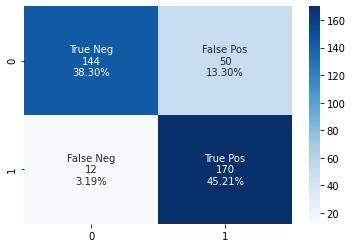

In [198]:
#svc = SVC(kernel='poly', degree=1, gamma= 0.006309573444802098, C=0.7286181745132225) # FOR NOT REDUCED
svc = SVC(kernel='linear', gamma=0.1, C=1000) 
#svc = SVC(kernel='linear', gamma=0.0001, C=100)
#svc = SVC(kernel='rbf', gamma=0.001, C=10) # FOR REDUCED
svc.fit(reduced_train_data, train_target)
svc_predictions = svc.predict(reduced_test_data)
print('Train acc: ',svc.score(reduced_train_data, train_target))
print('Test acc: ', svc.score(reduced_test_data, test_target))

train_test_arr.update(SVC = [svc.score(reduced_train_data, train_target), svc.score(reduced_test_data, test_target)])


#svc.fit(train_data, train_target)
#svc_predictions = svc.predict(test_data)
#print('Train acc: ',svc.score(train_data, train_target))
#print('Test acc: ', svc.score(test_data, test_target))

f1_svc = f1_score(test_target, svc_predictions)
acc_sc_svc = accuracy_score(test_target, svc_predictions)
prec_sc_svc = precision_score(test_target, svc_predictions, average='micro')

print('F1 score: ', f1_svc)
print('Accuracy score: ', acc_sc_svc)
print('Precision score: ', prec_sc_svc)
#print('Train acc: ',selector.score(train_data, train_target))
#print('Test acc: ', selector.score(test_data, test_target))
#print("Optimal number of features : %d" % selector.n_features_)

confusion_heatmap(test_target, svc_predictions)

accuracy_arr.append(acc_sc_svc)

arr.append(['SVC', svc.score(reduced_train_data, train_target), svc.score(reduced_test_data, test_target), f1_svc, acc_sc_svc, prec_sc_svc])


In [0]:
#lr_curve(svc)

In [0]:
# PIPELINE 

pipe_results = []

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score:  0.8996579247434435
Test score:  0.8324468085106383
F1 score:  0.8459657701711492
Accuracy score:  0.8324468085106383
Precision score:  0.8324468085106383


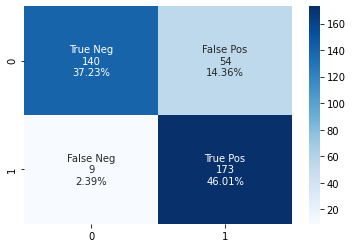

In [201]:

pca = PCA()
#pipe = Pipeline(steps=[('binarizer', Binarizer()), ('svc', SVC())])
pipe = Pipeline(steps=[('pca', pca), ('svc', SVC())])
#pipe = Pipeline(steps=[('binarizer', Binarizer()), ('rfc', RandomForestClassifier())])

pipe.fit(train_data, train_target)
print('Train score: ', pipe.score(train_data, train_target))
print('Test score: ', pipe.score(test_data, test_target))

pipe_predictions = pipe.predict(test_data)

f1_pipe = f1_score(test_target, pipe_predictions)
acc_sc_pipe = accuracy_score(test_target, pipe_predictions)
prec_sc_pipe = precision_score(test_target, pipe_predictions, average='micro')
print('F1 score: ', f1_pipe)
print('Accuracy score: ', acc_sc_pipe)
print('Precision score: ', prec_sc_pipe)

confusion_heatmap(test_target, pipe_predictions)

pipe_results.append(acc_sc_pipe)
arr.append(['Pipe with PCA and SVC', pipe.score(train_data, train_target), pipe.score(test_data, test_target), f1_pipe, acc_sc_pipe, prec_sc_pipe])

In [0]:
param_grid = {'pca__n_components': [5, 10, 20, 27, 35, 40, 45]}  
search = GridSearchCV(pipe, param_grid=param_grid, cv=4)
#search.fit(reduced_train_data, train_target)
#print("Best parameter (CV score=%0.3f):" % search.best_score_)
#print(search.best_params_)
#print('Test_score:',search.score(reduced_test_data,test_target))

In [0]:
#lr_curve(pipe)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score:  0.7867730900798175
Test score:  0.7606382978723404
F1 score:  0.7772277227722771
Accuracy score:  0.7606382978723404
Precision score:  0.7606382978723404


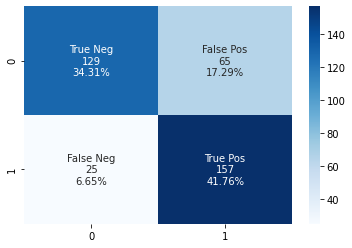

In [204]:
pipe2 = Pipeline(steps=[('pca', pca), ('gnb', GaussianNB())])
pipe2.fit(train_data, train_target)
print('Train score: ', pipe2.score(train_data, train_target))
print('Test score: ', pipe2.score(test_data, test_target))
pipe2_predictions = pipe2.predict(test_data)

f1_pipe2 = f1_score(test_target, pipe2_predictions)
acc_sc_pipe2 = accuracy_score(test_target, pipe2_predictions)
prec_sc_pipe2 = precision_score(test_target, pipe2_predictions, average='micro')
print('F1 score: ', f1_pipe2)
print('Accuracy score: ', acc_sc_pipe2)
print('Precision score: ', prec_sc_pipe2)

confusion_heatmap(test_target, pipe2_predictions)

pipe_results.append(acc_sc_pipe2)
arr.append(['Pipe with PCA and Gaussian Naive Bayes', pipe2.score(train_data, train_target), pipe2.score(test_data, test_target), f1_pipe2, acc_sc_pipe2, prec_sc_pipe2])

In [0]:
#lr_curve(pipe2)

2   2


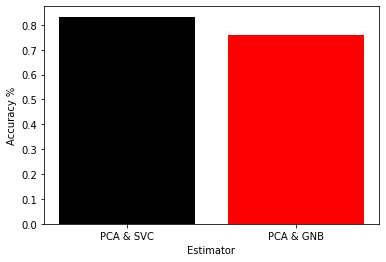

In [206]:
x_bars = ['PCA & SVC', 'PCA & GNB']
h = pipe_results
y_p = np.arange(len(x_bars))
print(len(y_p), ' ', len(h))
plt.bar(y_p, h, color=['black', 'red'])
plt.xticks(y_p, x_bars)
plt.xlabel('Estimator')
plt.ylabel('Accuracy %')
plt.show()

In [207]:
# Decision tree
params = [{'max_depth':[1,2,3,4,5,6,7,8,9,10],'min_samples_leaf':[1,2,3,5]}]
params_rf = [{'max_depth':[1,2,3,4,5,6,7,8,9,10]}]
clf_dtree = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),param_grid=params,scoring='accuracy',cv=10,return_train_score=True)
clf_dtree.fit(reduced_train_data,train_target)
#clf_dtree.fit(train_data,train_target)
print('Best-params:',clf_dtree.best_params_)
print('Best-score:',clf_dtree.best_score_)
print(clf_dtree.cv_results_.keys())

Best-params: {'max_depth': 1, 'min_samples_leaf': 1}
Best-score: 0.8551985370950888
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_leaf', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])


In [208]:
df = pd.DataFrame(clf_dtree.cv_results_)
print(df.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'split5_train_score', 'split6_train_score', 'split7_train_score',
       'split8_train_score', 'split9_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')


1
2
3
5


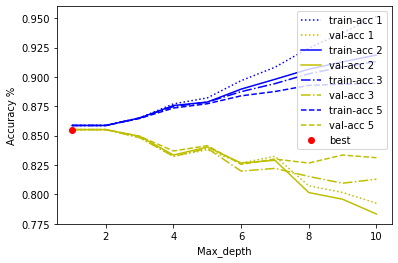

In [209]:
# Visualizing the result of grid search for Decision tree

f = plt.figure()
#f.set_figheight(12)
#f.set_figwidth(12)
line_styles = [':','-','-.','--']
#print(df['param_min_samples_leaf'])

for m,l in zip(df['param_min_samples_leaf'].unique(),line_styles):
  print(m)
  subd_df = df[df['param_min_samples_leaf']==m]
  #print(subd_df)
  depth = subd_df['param_max_depth']
  train_means = subd_df['mean_train_score'].values
  val_means = subd_df['mean_test_score'].values
  plt.plot(depth,train_means,'b'+l,label='train-acc '+str(m))
  plt.plot(depth,val_means,'y'+l,label='val-acc '+str(m))
plt.plot(clf_dtree.best_params_['max_depth'],clf_dtree.best_score_,'ro',label='best')
plt.ylabel('Accuracy %')
plt.xlabel('Max_depth')
plt.legend()

Train accuracy:  0.8586088939566705
Test accuracy:  0.8271276595744681
F1 score:  0.8320413436692506
Accuracy score:  0.8271276595744681
Precision score:  0.8271276595744681


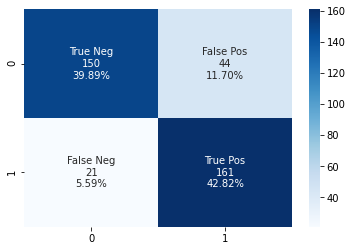

In [210]:
decision_tree = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
#decision_tree = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1)

decision_tree.fit(reduced_train_data, train_target)
#decision_tree.fit(train_data, train_target)


dtree_predictions = decision_tree.predict(reduced_test_data)
#dtree_predictions = decision_tree.predict(test_data)


print('Train accuracy: ', decision_tree.score(reduced_train_data, train_target))
print('Test accuracy: ', decision_tree.score(reduced_test_data, test_target))
#print('Train accuracy: ', decision_tree.score(train_data, train_target))
#print('Test accuracy: ', decision_tree.score(test_data, test_target))

train_test_arr.update(DecisionTree = [decision_tree.score(reduced_train_data, train_target), decision_tree.score(reduced_test_data, test_target)])


f1_dtree = f1_score(test_target, dtree_predictions)
acc_sc_dtree = accuracy_score(test_target, dtree_predictions)
prec_sc_dtree = precision_score(test_target, dtree_predictions, average='micro')
print('F1 score: ', f1_dtree)
print('Accuracy score: ', acc_sc_dtree)
print('Precision score: ', prec_sc_dtree)

confusion_heatmap(test_target, dtree_predictions)

accuracy_arr.append(acc_sc_dtree)

arr.append(['Desicion Tree Classifier', decision_tree.score(reduced_train_data, train_target), decision_tree.score(reduced_test_data, test_target), f1_dtree, acc_sc_dtree, prec_sc_dtree])


In [0]:
#lr_curve(decision_tree)

Train accuracy:  0.8540478905359179
Test accuracy:  0.8351063829787234
F1 score:  0.8450000000000001
Accuracy score:  0.8351063829787234
Precision score:  0.8351063829787234


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


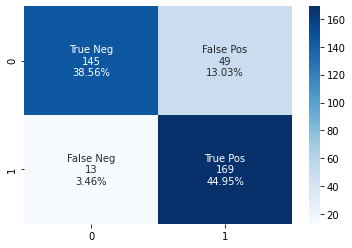

In [212]:
tuned_params = {
    'n_estimators':[1, 3, 5, 8, 10, 13],
    'max_samples':[1.0],
    'max_features':[1.0]}

#three1 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
three1 = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1)
b_three = BaggingClassifier(three1, n_estimators=3, random_state=3)


b_three.fit(reduced_train_data, train_target)
b_three_pred = b_three.predict(reduced_test_data)

#b_three.fit(train_data, train_target)
#b_three_pred = b_three.predict(test_data)

print('Train accuracy: ', b_three.score(reduced_train_data, train_target))
print('Test accuracy: ', b_three.score(reduced_test_data, test_target))
#print('Train accuracy: ', b_three.score(train_data, train_target))
#print('Test accuracy: ', b_three.score(test_data, test_target))

train_test_arr.update(BaggingClassifier = [b_three.score(reduced_train_data, train_target), b_three.score(reduced_test_data, test_target)])


f1_dtree = f1_score(test_target, b_three_pred)
acc_sc_dtree = accuracy_score(test_target, b_three_pred)
prec_sc_dtree = precision_score(test_target, b_three_pred, average='micro')
print('F1 score: ', f1_dtree)
print('Accuracy score: ', acc_sc_dtree)
print('Precision score: ', prec_sc_dtree)

confusion_heatmap(test_target, b_three_pred)

accuracy_arr.append(acc_sc_dtree)

arr.append(['Bagging Classifier with Desicion Tree Classifier', b_three.score(reduced_train_data, train_target), b_three.score(reduced_test_data, test_target), f1_dtree, acc_sc_dtree, prec_sc_dtree])

In [0]:
#lr_curve(b_three)

In [214]:
# Tuning parameters for BaggingClassifier
gs_bagging = GridSearchCV(b_three,tuned_params,cv=4,return_train_score=True)
gs_bagging.fit(reduced_train_data,train_target)
#gs_bagging.fit(train_data,train_target)

print(gs_bagging.score(reduced_test_data,test_target))
print(gs_bagging.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

0.8351063829787234
{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [215]:
KNeighborsClassifier().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [216]:
# Tuning parameters for KNN
# 'weights': ['distance', 'uniform']
params_rf = [{'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}]
clf_knn = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_rf,scoring='accuracy',cv=10,return_train_score=True)
clf_knn.fit(reduced_train_data,train_target)
#clf_knn.fit(train_data, train_target)
print('Best-params:',clf_knn.best_params_)
print('Best-score:',clf_knn.best_score_)
print(clf_knn.cv_results_.keys())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

Best-params: {'n_neighbors': 19}
Best-score: 0.8597962382445141
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


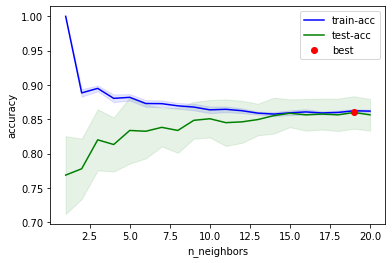

In [217]:
# Visualizing the grid search result for KNN

test_means = clf_knn.cv_results_['mean_test_score']
test_stds = clf_knn.cv_results_['std_test_score']

train_means = clf_knn.cv_results_['mean_train_score']  
train_stds = clf_knn.cv_results_['std_train_score']

n_neigh = clf_knn.param_grid[0]['n_neighbors'] 

plt.plot(n_neigh,train_means,label='train-acc',c='b')
plt.fill_between(n_neigh, train_means - train_stds, train_means + train_stds, alpha=0.1, color="b")

plt.plot(n_neigh,test_means,label='test-acc',c='g')
plt.fill_between(n_neigh, test_means - test_stds, test_means + test_stds, alpha=0.1, color="g")

plt.plot(clf_knn.best_params_['n_neighbors'],clf_knn.best_score_,'o',color='r',label='best') # point best score

plt.xlabel("n_neighbors")
plt.ylabel('accuracy')
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


tr:  0.863169897377423
Test acc:  0.8218085106382979
F1 score:  0.8203753351206434
Accuracy score:  0.8218085106382979
Precision score:  0.8218085106382979


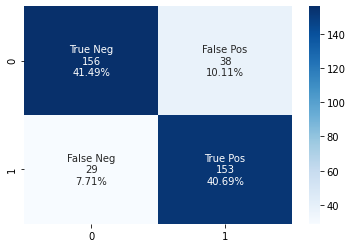

In [218]:
knn = KNeighborsClassifier(n_neighbors=19, weights='uniform')
#knn = KNeighborsClassifier(n_neighbors=9, weights='distance')

knn.fit(reduced_train_data, train_target)
#knn.fit(train_data, train_target)


knn_predictions = knn.predict(reduced_test_data)
#knn_predictions = knn.predict(test_data)


print('tr: ', knn.score(reduced_train_data, train_target))
print('Test acc: ', knn.score(reduced_test_data, test_target))

#print('tr: ', knn.score(train_data, train_target))
#print('Test acc: ', knn.score(test_data, test_target))

train_test_arr.update(KNN = [knn.score(reduced_train_data, train_target), knn.score(reduced_test_data, test_target)])


f1_knn = f1_score(test_target, knn_predictions)
acc_sc_knn = accuracy_score(test_target, knn_predictions)
prec_sc_knn = precision_score(test_target, knn_predictions, average='micro')
print('F1 score: ', f1_knn)
print('Accuracy score: ', acc_sc_knn)
print('Precision score: ', prec_sc_knn)

confusion_heatmap(test_target, knn_predictions)

accuracy_arr.append(acc_sc_knn)

arr.append(['K-Neighbors Classifier', knn.score(reduced_train_data, train_target), knn.score(reduced_test_data, test_target), f1_knn, acc_sc_knn, prec_sc_knn])

In [0]:
#lr_curve(knn)

In [220]:
# Tuning parameters for RandomForestClassifier

param_distr = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11]}
clf_rf = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_distr, scoring='accuracy', return_train_score=True)
#clf_rf.fit(train_data, train_target)
clf_rf.fit(reduced_train_data, train_target)
print('Best-params:',clf_rf.best_params_)
print('Best-score:',clf_rf.best_score_)
print(clf_rf.cv_results_.keys())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

Best-params: {'max_depth': 2}
Best-score: 0.8528701298701298
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train accuracy:  0.8586088939566705
Test accuracy:  0.8271276595744681
F1 score:  0.8320413436692506
Accuracy score:  0.8271276595744681
Precision score:  0.8271276595744681


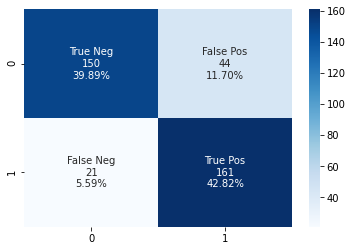

In [221]:
rf = RandomForestClassifier(max_depth=1)
rf.fit(reduced_train_data, train_target)
rfc_predictions = rf.predict(reduced_test_data)
#rf.fit(train_data, train_target)
#rfc_predictions = rf.predict(test_data)
print('Train accuracy: ', rf.score(reduced_train_data, train_target))
print('Test accuracy: ', rf.score(reduced_test_data, test_target))
#print('Train accuracy: ', rf.score(train_data, train_target))
#print('Test accuracy: ', rf.score(test_data, test_target))

train_test_arr.update(RandomForest = [rf.score(reduced_train_data, train_target), rf.score(reduced_test_data, test_target)])


f1_rfc = f1_score(test_target, rfc_predictions)
acc_sc_rfc = accuracy_score(test_target, rfc_predictions)
prec_sc_rfc = precision_score(test_target, rfc_predictions, average='micro')
print('F1 score: ', f1_rfc)
print('Accuracy score: ', acc_sc_rfc)
print('Precision score: ', prec_sc_rfc)

confusion_heatmap(test_target, rfc_predictions)

accuracy_arr.append(acc_sc_rfc)


arr.append(['Random Forest Classifier', rf.score(reduced_train_data, train_target), rf.score(reduced_test_data, test_target), f1_rfc, acc_sc_rfc, prec_sc_rfc])

In [0]:
#lr_curve(rf)

In [223]:
# Tuning parameters for AdaBoostClassifier

param_grid = {'n_estimators': [100, 300, 600, 1000], 'learning_rate': [0.1, 0.3, 0.5, 1], 
              'algorithm': ['SAMME', 'SAMME.R']}
clfada = RandomizedSearchCV(estimator=AdaBoostClassifier(),param_distributions=param_grid,scoring='accuracy',cv=10,return_train_score=True)
#clfada = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=param_grid,scoring='accuracy',cv=10,return_train_score=True) # Very slow
clfada.fit(reduced_train_data,train_target)
#clfada.fit(train_data,train_target)

print('Best-params:',clfada.best_params_)
print('Best-score:',clfada.best_score_)
print(clfada.cv_results_.keys())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best-params: {'n_estimators': 300, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}
Best-score: 0.8551985370950888
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_estimators', 'param_learning_rate', 'param_algorithm', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])


In [224]:
AdaBoostClassifier().get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train accuracy:  0.8586088939566705
Test accuracy:  0.8271276595744681
F1 score:  0.8320413436692506
Accuracy score:  0.8271276595744681
Precision score:  0.8271276595744681


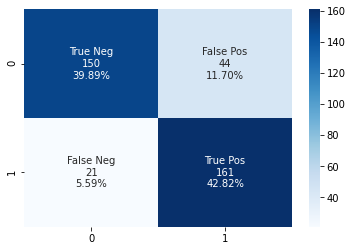

In [225]:
#adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm='SAMME.R', n_estimators=100, learning_rate=0.1)  # tune the parameters!!!!
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm='SAMME',
                         n_estimators=1000, learning_rate=0.1)
adaboost.fit(reduced_train_data, train_target)
#adaboost.fit(train_data, train_target)

adaboost_predictions = adaboost.predict(reduced_test_data)
#adaboost_predictions = adaboost.predict(test_data)

print('Train accuracy: ', adaboost.score(reduced_train_data, train_target))
print('Test accuracy: ', adaboost.score(reduced_test_data, test_target))
#print('Train accuracy: ', adaboost.score(train_data, train_target))
#print('Test accuracy: ', adaboost.score(test_data, test_target))

train_test_arr.update(AdaBoost = [adaboost.score(reduced_train_data, train_target), adaboost.score(reduced_test_data, test_target)])


f1_ab = f1_score(test_target, adaboost_predictions)
acc_sc_ab = accuracy_score(test_target, adaboost_predictions)
prec_sc_ab = precision_score(test_target, adaboost_predictions, average='micro')
print('F1 score: ', f1_ab)
print('Accuracy score: ', acc_sc_ab)
print('Precision score: ', prec_sc_ab)

confusion_heatmap(test_target, adaboost_predictions)

accuracy_arr.append(acc_sc_ab)
arr.append(['Ada Boost Classifier', adaboost.score(reduced_train_data, train_target), adaboost.score(reduced_test_data, test_target), f1_ab, acc_sc_ab, prec_sc_ab])

In [0]:
#lr_curve(adaboost)

In [227]:
for elem in arr:
  for i in range(1, len(elem)):
    elem[i] = round(elem[i], 3)

arr_df = pd.DataFrame(np.array(arr), columns=['Estimator name', 'Train score', 'Test score', 'F1 score', 'Accuracy score', 'Precision score'])

arr_df

,Estimator name,Train score,Test score,F1 score,Accuracy score,Precision score
0,Dummy classifier,0.513,0.484,0.652,0.484,0.484
1,Gaussian Naive Bayes,0.852,0.835,0.845,0.835,0.835
2,MLP,0.852,0.835,0.845,0.835,0.835
3,SVC,0.848,0.835,0.846,0.835,0.835
4,Pipe with PCA and SVC,0.9,0.832,0.846,0.832,0.832
5,Pipe with PCA and Gaussian Naive Bayes,0.787,0.761,0.777,0.761,0.761
6,Desicion Tree Classifier,0.859,0.827,0.832,0.827,0.827
7,Bagging Classifier with Desicion Tree Classifier,0.854,0.835,0.845,0.835,0.835
8,K-Neighbors Classifier,0.863,0.822,0.82,0.822,0.822
9,Random Forest Classifier,0.859,0.827,0.832,0.827,0.827


[0.48404255319148937, 0.8351063829787234, 0.8351063829787234, 0.8351063829787234, 0.8271276595744681, 0.8351063829787234, 0.8218085106382979, 0.8271276595744681, 0.8271276595744681]
9   9


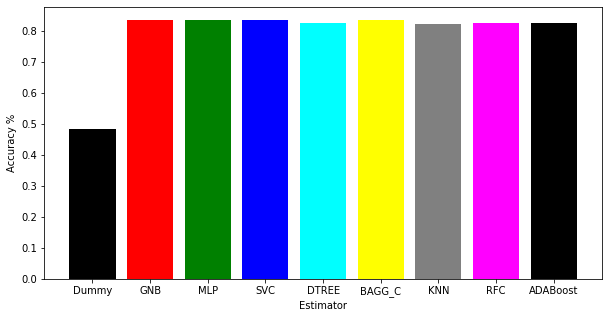

In [228]:
# Visualization of accuracy_score results for different models 

print(accuracy_arr)
bars = ['Dummy', 'GNB','MLP', 'SVC', 'DTREE', 'BAGG_C', 'KNN', 'RFC', 'ADABoost']
height = accuracy_arr
y_pos = np.arange(len(bars))
print(len(y_pos), ' ', len(height))
plt.figure(figsize=(10,5))
plt.bar(y_pos, height, color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'grey', 'magenta', 'black'])
plt.xticks(y_pos, bars)
plt.xlabel('Estimator')
plt.ylabel('Accuracy %')
plt.show()
#plt.savefig('accuracy_not_reduced.png')

**COMPARING THE RESULTS USING DIFFERENT DEPTH (RandomForestClassifier, DecisionTreeClassifier)**

In [229]:
params_rf = [{'max_depth': [i for i in range(1, 26)]}]
clf1 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params_rf,scoring='accuracy',cv=10,return_train_score=True)
clf1.fit(reduced_train_data,train_target)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [0]:
mean_test_scores_clf1 = clf1.cv_results_['mean_test_score']
rf_depth = clf1.param_grid[0]['max_depth']

Text(0.5, 1.0, 'Random Forest Classifier')

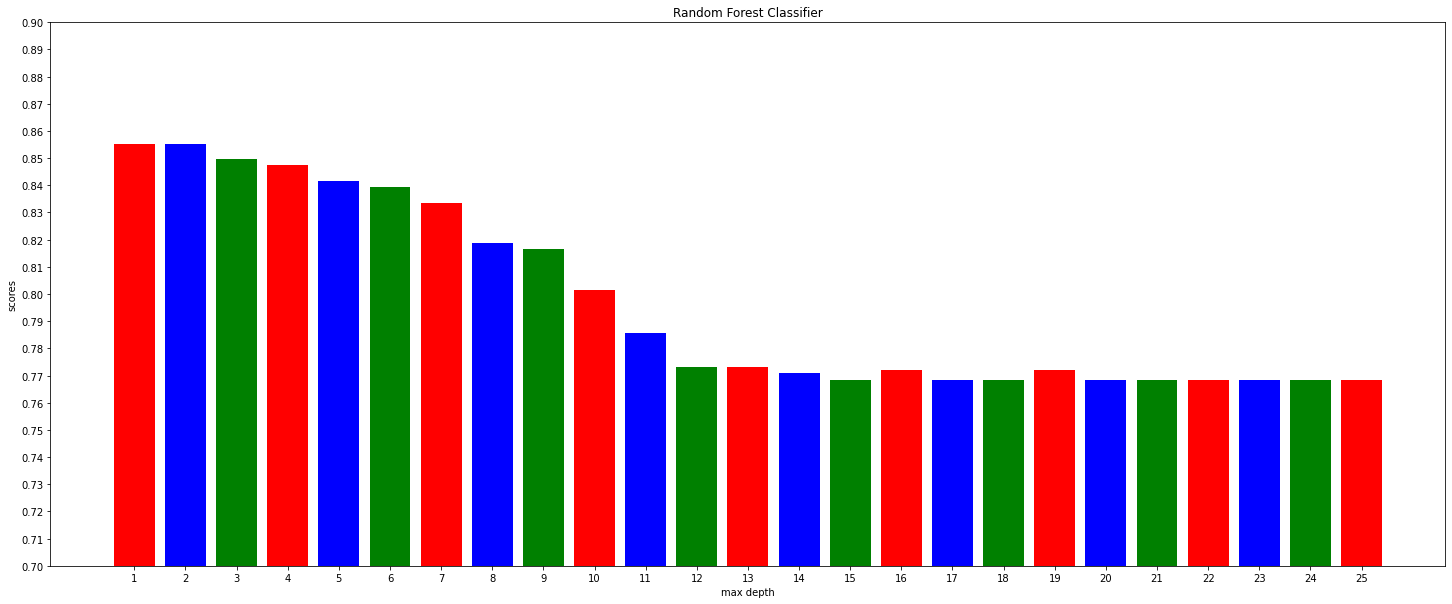

In [231]:
plt.figure(figsize=(25,10))
plt.bar(rf_depth, mean_test_scores_clf1, color = ['red', 'blue', 'green'])
plt.xticks(rf_depth, rf_depth)
plt.yticks(np.arange(0.7, 1, step=0.01))

plt.xlabel('max depth')
plt.ylabel('scores')

plt.ylim(0.7, 0.9)
plt.title('Random Forest Classifier')

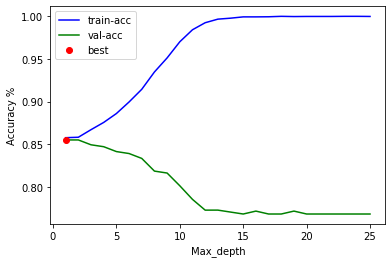

In [232]:
# Visualizing the results of tuning parameters for RandomForestClassifier

val_means = clf1.cv_results_['mean_test_score']
train_means = clf1.cv_results_['mean_train_score']

max_depth=clf1.param_grid[0]['max_depth']

plt.plot(max_depth,train_means,label='train-acc',c='b')

plt.plot(max_depth,val_means,label='val-acc',c='g')

plt.plot(clf1.best_params_['max_depth'],clf1.best_score_,'o',color='r',label='best')


plt.xlabel("Max_depth")
plt.ylabel('Accuracy %')
plt.legend()

In [233]:
params = [{'max_depth': [i for i in range(1, 26)]}]
clf_dtree1 = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),param_grid=params,scoring='accuracy',cv=10,return_train_score=True)
clf_dtree1.fit(reduced_train_data,train_target)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14,

In [0]:
mean_test_scores_dtree1 = clf_dtree1.cv_results_['mean_test_score']
depth = clf_dtree1.param_grid[0]['max_depth']

Text(0.5, 1.0, 'Decision Tree Classifier')

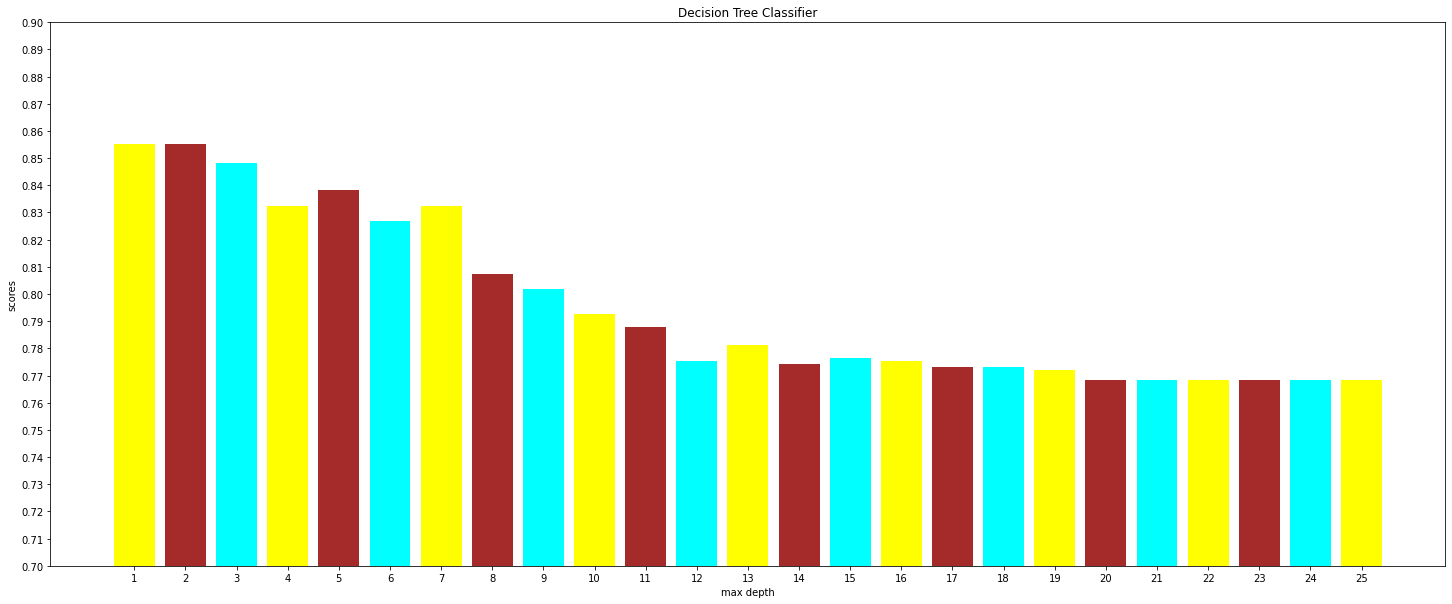

In [235]:
plt.figure(figsize=(25,10))
plt.bar(depth, mean_test_scores_dtree1, color = ['yellow', 'brown', 'cyan'])
plt.xticks(depth, depth)
plt.yticks(np.arange(0.7, 1, step=0.01))

plt.xlabel('max depth')
plt.ylabel('scores')

plt.ylim(0.7, 0.9)
plt.title('Decision Tree Classifier')

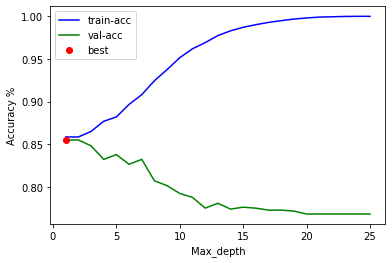

In [236]:
val_means_d = clf_dtree1.cv_results_['mean_test_score']
train_means_d = clf_dtree1.cv_results_['mean_train_score']

max_depth_d=clf_dtree1.param_grid[0]['max_depth']

plt.plot(max_depth_d,train_means_d,label='train-acc',c='b')

plt.plot(max_depth_d,val_means_d,label='val-acc',c='g')

plt.plot(clf_dtree1.best_params_['max_depth'],clf_dtree1.best_score_,'o',color='r',label='best')


plt.xlabel("Max_depth")
plt.ylabel('Accuracy %')
plt.legend()

**Comparing the results of MLPClassifier when it is used with reduced and not reduced data**

In [237]:
mlp_not_reduced = MLPClassifier(activation='tanh', solver='sgd', shuffle=True)
mlp_not_reduced.fit(train_data, train_target)
predictions_not_reduced = mlp_not_reduced.predict(test_data)
accuracy_not_reduced = accuracy_score(predictions_not_reduced, test_target)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [238]:
mlp_not_reduced = MLPClassifier(activation='tanh', solver='sgd', shuffle=True)
mlp_not_reduced.fit(reduced_train_data, train_target)
predictions_reduced = mlp_not_reduced.predict(reduced_test_data)
accuracy_reduced = accuracy_score(predictions_reduced, test_target)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.5, 1.0)

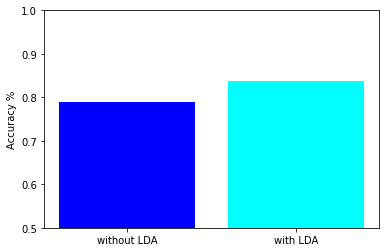

In [239]:
bars1 = ['without LDA', 'with LDA']
height1 = [accuracy_not_reduced, accuracy_reduced]
pos = [0, 1]
plt.bar(pos, height1, color=['blue','cyan'])
plt.xticks(pos, bars1)
plt.ylabel('Accuracy %')
plt.ylim(0.5, 1.0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00d8ccd278>,
      dtype=object)

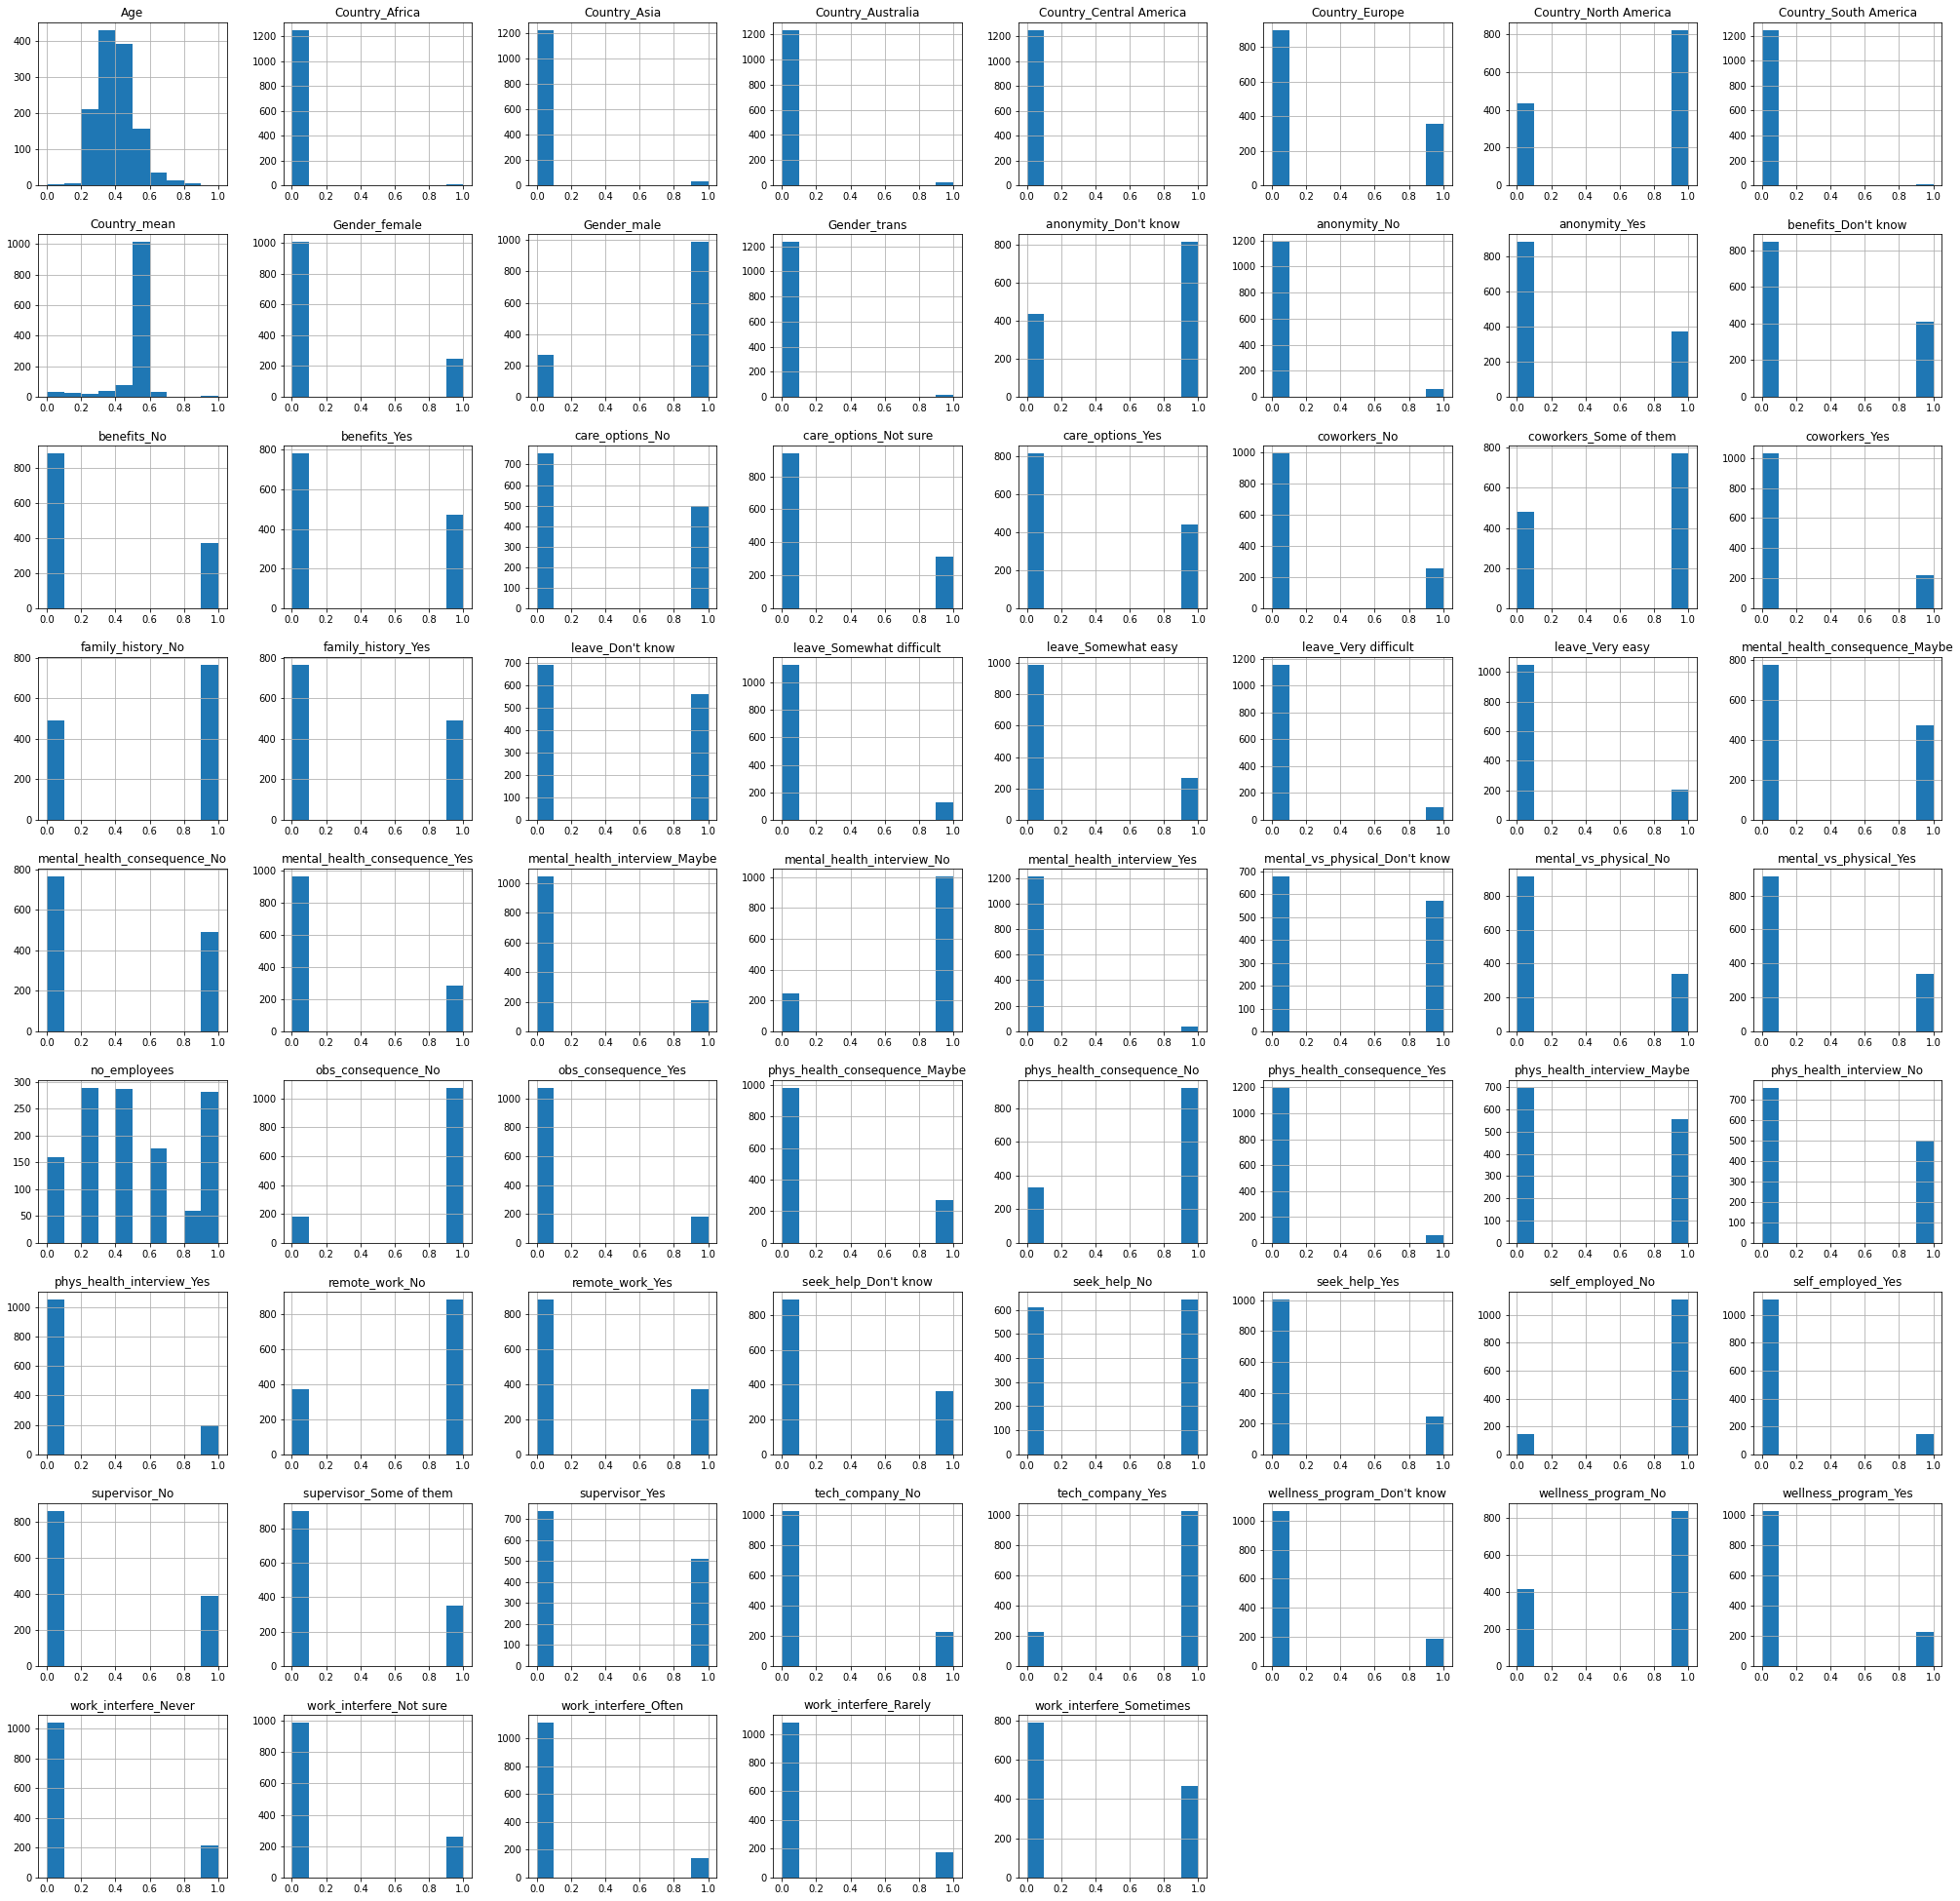

In [240]:
data.hist(figsize=(35,35))

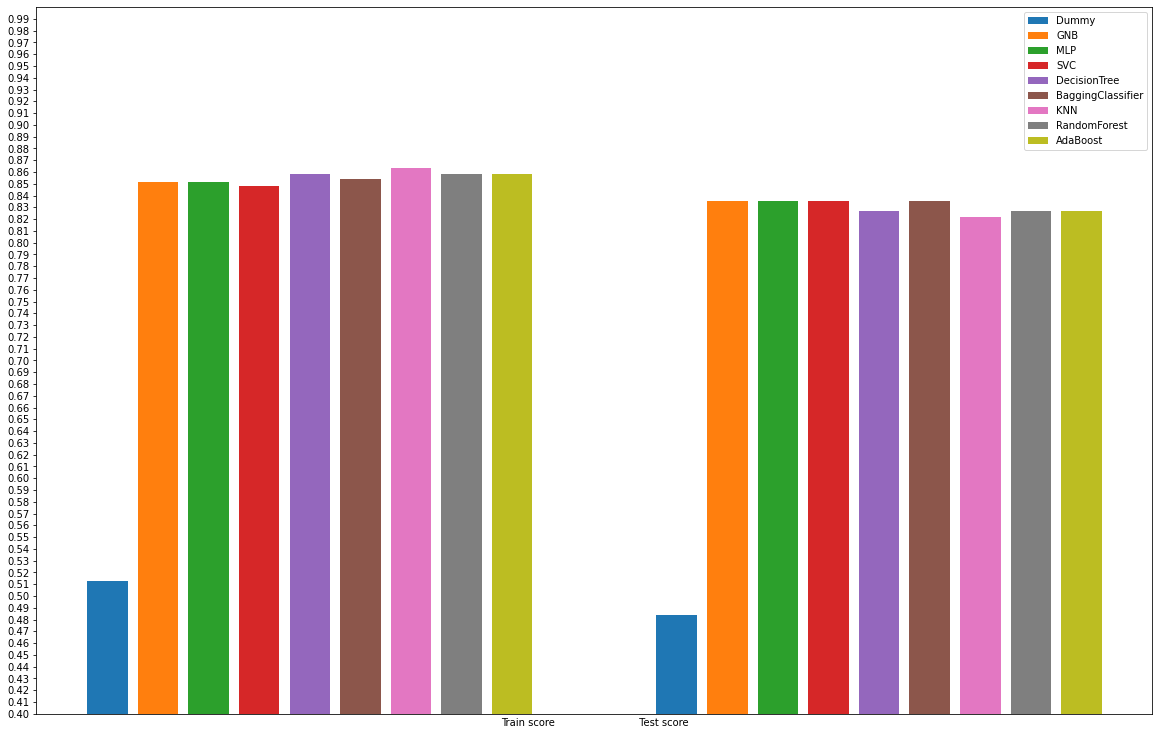

In [241]:
fig, ax = plt.subplots(figsize=(20, 13))
bar_plot(ax=ax, data=train_test_arr, total_width=.8, single_width=.8)
plt.show()
plt.close()